In [236]:
import pandas as pd
import sys
import os
scripts_path = "../scripts"
sys.path.append(scripts_path)


In [237]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)

from time_analysisss import load_data

df = load_data("../data/raw/NS- time table for Downward.csv")



In [238]:
import sys
sys.path.append('../scripts')  # adjust if needed

import importlib
import passenger_flow_utils
importlib.reload(passenger_flow_utils)

from passenger_flow_utils import basic_checks


In [239]:
df.head()

,Stations,Stations .1,Train times,20101,20201,20301,20401,20501,20601,20701,...,20115,20215,20315,20415,20615,20715,20815,20217,20317,20417
0,Menilik II Square T22702,NS27,Returning,5:57:00,6:12:00,6:27:00,6:42:00,7:03:00,7:18:00,7:33:00,...,20:03:00,20:18:00,20:38:00,20:58:00,21:18:00,21:38:00,21:58:00,22:16:20,22:36:20,22:59:20
1,Menilik II Square T22705,NS27,Arrival,5:57:36,6:12:36,6:27:36,6:42:36,7:03:36,7:18:36,7:33:36,...,20:03:36,20:18:36,20:38:36,20:58:36,21:18:36,21:38:36,21:58:36,22:16:56,22:36:56,22:59:56
2,Menilik II Square T22705,NS27,Departure,5:59:00,6:14:00,6:29:00,6:44:00,7:05:00,7:20:00,7:35:00,...,20:05:00,20:20:00,20:40:00,21:00:00,21:20:00,21:40:00,22:00:00,22:16:50,22:36:56,22:59:56
3,Atikilt Tera,NS26,Arrival,6:01:42,6:16:42,6:31:42,6:46:42,7:07:42,7:22:42,7:37:42,...,20:07:42,20:22:42,20:42:42,21:02:42,21:22:42,21:42:42,22:02:42,NaN,NaN,NaN
4,Atikilt Tera,NS26,Departure,6:02:12,6:17:12,6:32:12,6:47:12,7:08:12,7:23:12,7:38:12,...,20:08:12,20:23:12,20:43:12,21:03:12,21:23:12,21:43:12,22:03:12,NaN,NaN,NaN


In [240]:
# drop rows Train times = "Returning" 
df = df[df['Train times'] != 'Returning']

In [241]:
basic_checks(df)

--- Shape ---
(46, 73)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 73 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Stations     46 non-null     object
 1   Stations .1  46 non-null     object
 2   Train times  46 non-null     object
 3   20101        46 non-null     object
 4   20201        46 non-null     object
 5   20301        46 non-null     object
 6   20401        46 non-null     object
 7   20501        46 non-null     object
 8   20601        46 non-null     object
 9   20701        46 non-null     object
 10  20801        46 non-null     object
 11  20901        46 non-null     object
 12  20103        46 non-null     object
 13  20203        46 non-null     object
 14  20303        46 non-null     object
 15  20403        46 non-null     object
 16  20503        46 non-null     object
 17  20603        46 non-null     object
 18  20703        46 non-null     object

In [242]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import drop_high_nan_columns

df = drop_high_nan_columns(df, threshold=0.9)


Dropping columns with > 90.0% NaNs: ['20217', '20317', '20417']


In [243]:
# raname columns for better readability
df = df.rename(columns={'Stations .1': 'station_id'})
df = df.rename(columns={'Train times': 'arrival_departure'})
df = df.rename(columns={'Stations ': 'Stations'})



In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 70 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Stations           46 non-null     object
 1   station_id         46 non-null     object
 2   arrival_departure  46 non-null     object
 3   20101              46 non-null     object
 4   20201              46 non-null     object
 5   20301              46 non-null     object
 6   20401              46 non-null     object
 7   20501              46 non-null     object
 8   20601              46 non-null     object
 9   20701              46 non-null     object
 10  20801              46 non-null     object
 11  20901              46 non-null     object
 12  20103              46 non-null     object
 13  20203              46 non-null     object
 14  20303              46 non-null     object
 15  20403              46 non-null     object
 16  20503              46 non-null     object
 17 

In [245]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import melt_and_pivot_train_schedule

df_pivot = melt_and_pivot_train_schedule(df)



c:\Users\nebiy\OneDrive\Documents\code\Train-Passenger-Flow-Analysis\notebooks\../scripts\time_analysisss.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pivot['Arrival'] = pd.to_datetime(df_pivot['Arrival'], errors='coerce')
c:\Users\nebiy\OneDrive\Documents\code\Train-Passenger-Flow-Analysis\notebooks\../scripts\time_analysisss.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pivot['Departure'] = pd.to_datetime(df_pivot['Departure'], errors='coerce')


In [246]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Stations    1601 non-null   object        
 1   station_id  1601 non-null   object        
 2   train_id    1601 non-null   object        
 3   Arrival     1541 non-null   datetime64[ns]
 4   Departure   1534 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 62.7+ KB


In [248]:
# Print rows with NaNs in Arrival or Departure
print(df_pivot[df_pivot['Arrival'].isna() | df_pivot['Departure'].isna()])

# Replace NaNs with 0


arrival_departure                  Stations station_id train_id  \
536                           Kality T20623        NS6    20101   
537                           Kality T20623        NS6    20103   
538                           Kality T20623        NS6    20105   
539                           Kality T20623        NS6    20107   
540                           Kality T20623        NS6    20109   
..                                      ...        ...      ...   
792                Menilik II Square T22702       NS27    20815   
793                Menilik II Square T22702       NS27    20901   
794                Menilik II Square T22702       NS27    20903   
795                Menilik II Square T22702       NS27    21001   
796                Menilik II Square T22702       NS27    21003   

arrival_departure             Arrival           Departure  
536                               NaT 2025-07-30 06:50:34  
537                               NaT 2025-07-30 08:56:34  
538            

In [249]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import fill_missing_times_with_station_avg

df_pivot = fill_missing_times_with_station_avg(df_pivot)


In [250]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import calculate_dwell_time
df_pivot = calculate_dwell_time(df_pivot)


In [251]:
basic_checks(df_pivot)

--- Shape ---
(1601, 6)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Stations    1601 non-null   object         
 1   station_id  1601 non-null   object         
 2   train_id    1601 non-null   object         
 3   Arrival     1601 non-null   datetime64[ns] 
 4   Departure   1601 non-null   datetime64[ns] 
 5   Dwell Time  1601 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), object(3), timedelta64[ns](1)
memory usage: 75.2+ KB

--- Null Values ---
arrival_departure
Stations      0
station_id    0
train_id      0
Arrival       0
Departure     0
Dwell Time    0
dtype: int64

--- Descriptive Statistics ---
arrival_departure                        Arrival  \
count                                       1601   
mean               2025-07-30 14:04:37.360036352   
min                          2025-07-30 05:57:00

In [252]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import check_null
check_null(df_pivot)

arrival_departure
Stations      0.0
station_id    0.0
train_id      0.0
Arrival       0.0
Departure     0.0
Dwell Time    0.0
dtype: float64


In [253]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import compute_station_gap_stats

station_stats = compute_station_gap_stats(df_pivot)

Computed station gap stats:


                    Stations    Avg_Gap  Min_Gap  Max_Gap   Gap_Std
11  Menilik II Square T22702   7.150656      0.0     21.0  7.443310
8              Kality T20623   7.977005      0.0     21.0  7.563769
0                      Abnet  14.560606      6.0     21.0  3.059054
1                        Abo  14.560606      6.0     21.0  3.059054
4               Autobus Tera  14.560606      6.0     21.0  3.059054


In [254]:
df_pivot["Dwell Time"]

0      0 days 00:00:25
1      0 days 00:00:25
2      0 days 00:00:25
3      0 days 00:00:25
4      0 days 00:00:25
             ...      
1596   0 days 00:00:25
1597   0 days 00:00:25
1598   0 days 00:00:25
1599   0 days 00:00:25
1600   0 days 00:00:25
Name: Dwell Time, Length: 1601, dtype: timedelta64[ns]

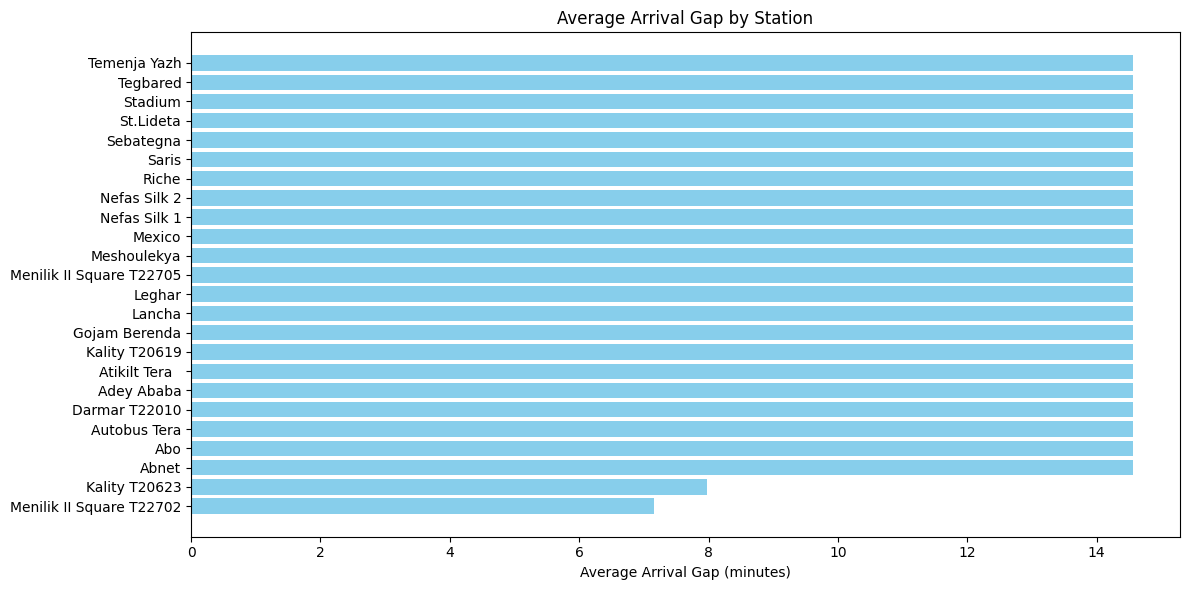

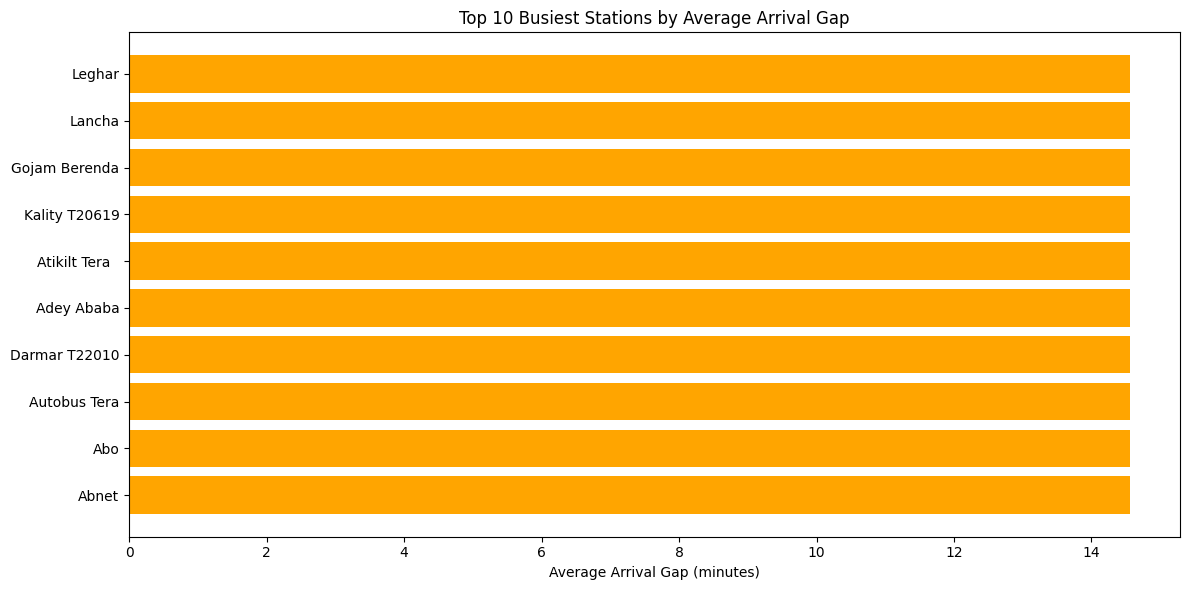

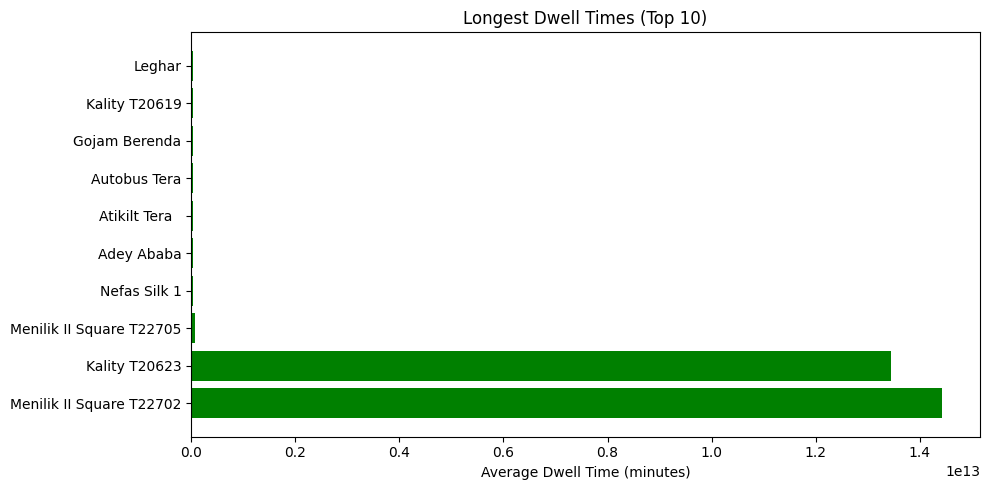

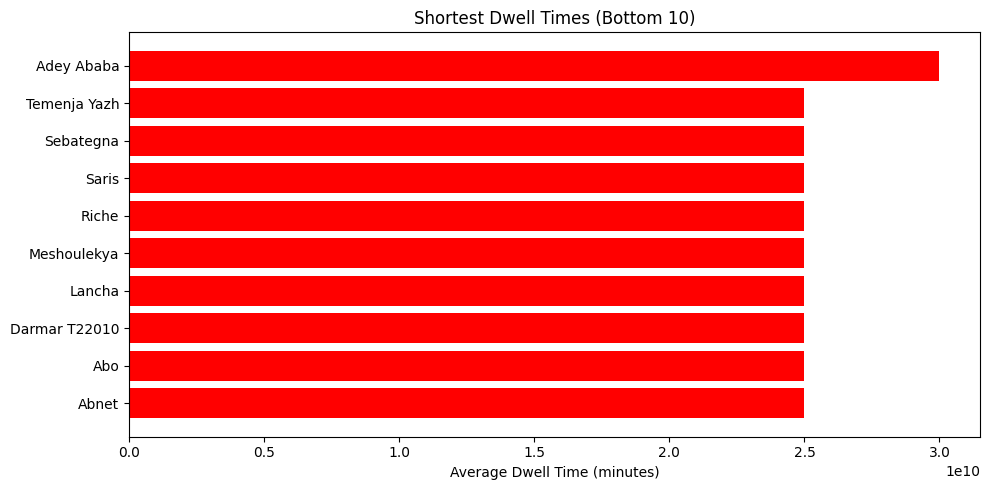

In [255]:
import importlib
import plot_utils  # This must succeed; make sure plot_utils.py is in the same directory or in PYTHONPATH

importlib.reload(plot_utils)

plot_utils.plot_avg_arrival_gap(station_stats)
plot_utils.plot_top_avg_gaps(station_stats)
plot_utils.plot_dwell_time_extremes(df_pivot)


In [256]:
df_pivot.columns

Index(['Stations', 'station_id', 'train_id', 'Arrival', 'Departure',
       'Dwell Time'],
      dtype='object', name='arrival_departure')

In [266]:
# a new dataframe with the stations,station_id and the average dwell time
avg_dwell_time = df_pivot.groupby('station_id')['Dwell Time'].mean().reset_index()
avg_dwell_time = avg_dwell_time.rename(columns={'Dwell Time': 'Average Dwell Time'})
avg_dwell_time.head(50)

,station_id,Average Dwell Time
0,NS10,0 days 00:00:35
1,NS11,0 days 00:00:30
2,NS12,0 days 00:00:25
3,NS13,0 days 00:00:25
4,NS14,0 days 00:00:25
5,NS15,0 days 00:00:25
6,NS16,0 days 00:00:30
7,NS17,0 days 00:00:30
8,NS18,0 days 00:00:30
9,NS19,0 days 00:00:30


In [258]:
print(df_pivot['Dwell Time'].dtype)
#print only Stations and dwell ime with dwell time greater than 10 minutes
#print(df_pivot[df_pivot['Dwell Time'] > pd.Timedelta(minutes=10)][["Stations","Dwell Time"]])
# update these rows with mean of the station with out dwell time greater than 10 minutes
df_pivot.loc[df_pivot['Dwell Time'] > pd.Timedelta(minutes=10), 'Dwell Time'] = avg_dwell_time['Average Dwell Time']
#df_pivot.head(50)

timedelta64[ns]


In [265]:
print(df_pivot[df_pivot['Dwell Time'] > pd.Timedelta(minutes=10)][["Stations","Dwell Time"]])


Empty DataFrame
Columns: [Stations, Dwell Time]
Index: []


In [260]:
#print rows of the station Kality
print(df_pivot[df_pivot['Stations'] == 'Kality '])

Empty DataFrame
Columns: [Stations, station_id, train_id, Arrival, Departure, Dwell Time]
Index: []


In [261]:
avg_dwell_time.head()

,station_id,Average Dwell Time
0,NS10,0 days 00:00:35
1,NS11,0 days 00:00:30
2,NS12,0 days 00:00:25
3,NS13,0 days 00:00:25
4,NS14,0 days 00:00:25


In [262]:
#save df_privot as csv
df_pivot.to_csv('../data/processed/NS-time table for_processed_Downward.csv', index=False)

In [263]:
df_pivot.columns

Index(['Stations', 'station_id', 'train_id', 'Arrival', 'Departure',
       'Dwell Time'],
      dtype='object', name='arrival_departure')